# 1. Primero importamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Mostrar todas las columnas del DataFrame 'df'
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


# 2. Cargamos el dataset y dividimos en train y test

In [2]:
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=1)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él.

df = pd.read_csv('./train.csv', sep=';', decimal='.')
df.head().T


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
ID,18084538,17460325,4655244,8985958,11634884
Listing Url,https://www.airbnb.com/rooms/18084538,https://www.airbnb.com/rooms/17460325,https://www.airbnb.com/rooms/4655244,https://www.airbnb.com/rooms/8985958,https://www.airbnb.com/rooms/11634884
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación acogedora cerca de C/ Fuencarral!,Camera privata a Madrid centro,"Spacious apartment at ""SOL""",habitacion amplia y luminosa chueca,Colourful single bedroom for female
...,...,...,...,...,...
Cancellation Policy,strict,flexible,flexible,flexible,flexible
Calculated host listings count,38.0,2.0,6.0,3.0,1.0
Reviews per Month,NaN,NaN,1.41,6.16,NaN
Geolocation,"40.4353366678,-3.70447949389","40.4117265406,-3.69976641183","40.4169249178,-3.70122131347","40.4233160503,-3.69872300671","40.4173756628,-3.67538333665"


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11824.0,1.030456e+07,5.578096e+06,1.986400e+04,5.576430e+06,1.137474e+07,1.538750e+07,1.910969e+07
Scrape ID,11824.0,2.017037e+13,5.713580e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.622308e+07,3.438067e+07,1.745300e+04,6.840576e+06,2.484778e+07,5.432919e+07,1.247534e+08
Host Response Rate,10280.0,9.477276e+01,1.526580e+01,0.000000e+00,9.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11822.0,1.257782e+01,3.416384e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,2.070000e+02
Host Total Listings Count,11822.0,1.257782e+01,3.416384e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,2.070000e+02
Latitude,11824.0,4.045253e+01,4.951248e+00,-3.785118e+01,4.040968e+01,4.041934e+01,4.043092e+01,5.596691e+01
Longitude,11824.0,-3.765850e+00,1.452390e+01,-1.231313e+02,-3.707555e+00,-3.700778e+00,-3.683917e+00,1.533714e+02
Accommodates,11824.0,3.267676e+00,2.094765e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11777.0,1.280419e+00,6.595199e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


Los datos se han cargado correctamente. Tenemos un dataset en Train de 11824 filas y 89 variables. Price  es la variable a predicir y el resto serán las variables predictoras, En una primera exploracion podemos ver variables categóricas y analíticas.

In [4]:
print(f'Las columnas son:', df.columns.values)


Las columnas son: ['ID' 'Listing Url' 'Scrape ID' 'Last Scraped' 'Name' 'Summary' 'Space'
 'Description' 'Experiences Offered' 'Neighborhood Overview' 'Notes'
 'Transit' 'Access' 'Interaction' 'House Rules' 'Thumbnail Url'
 'Medium Url' 'Picture Url' 'XL Picture Url' 'Host ID' 'Host URL'
 'Host Name' 'Host Since' 'Host Location' 'Host About'
 'Host Response Time' 'Host Response Rate' 'Host Acceptance Rate'
 'Host Thumbnail Url' 'Host Picture Url' 'Host Neighbourhood'
 'Host Listings Count' 'Host Total Listings Count' 'Host Verifications'
 'Street' 'Neighbourhood' 'Neighbourhood Cleansed'
 'Neighbourhood Group Cleansed' 'City' 'State' 'Zipcode' 'Market'
 'Smart Location' 'Country Code' 'Country' 'Latitude' 'Longitude'
 'Property Type' 'Room Type' 'Accommodates' 'Bathrooms' 'Bedrooms' 'Beds'
 'Bed Type' 'Amenities' 'Square Feet' 'Price' 'Weekly Price'
 'Monthly Price' 'Security Deposit' 'Cleaning Fee' 'Guests Included'
 'Extra People' 'Minimum Nights' 'Maximum Nights' 'Calendar Updated'


# 3. Limpieza de los datos del dataset de Training
Primero  vamos a ver con mas detalle las columnas para poder limpiar despues.

In [5]:
columnas = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview']
df.loc[:,columnas].head().T

,0,1,2,3,4
ID,18084538,17460325,4655244,8985958,11634884
Listing Url,https://www.airbnb.com/rooms/18084538,https://www.airbnb.com/rooms/17460325,https://www.airbnb.com/rooms/4655244,https://www.airbnb.com/rooms/8985958,https://www.airbnb.com/rooms/11634884
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación acogedora cerca de C/ Fuencarral!,Camera privata a Madrid centro,"Spacious apartment at ""SOL""",habitacion amplia y luminosa chueca,Colourful single bedroom for female
Summary,Esta habitación es acogedora y fresca al mismo...,Camera privata con letto matrimoniale a pochi ...,The apartment located in a restored old buildi...,habitación en pleno chueca a una calle de la e...,Take a look at this superb apartment situated ...
Space,Estudiantes y jóvenes profesionales,NaN,You have everything you need in 75 m2. An apar...,NaN,"The flat comes with three bedrooms, two bathro..."
Description,Esta habitación es acogedora y fresca al mismo...,Camera privata con letto matrimoniale a pochi ...,The apartment located in a restored old buildi...,habitación en pleno chueca a una calle de la e...,Take a look at this superb apartment situated ...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"El piso está situado en Chamberí, uno de los b...",NaN,This neighborhood is one of the most charming ...,"bares, useos, cafe, tiendas de ropa y calzados",Retiro is one of Madrid's poshest neighbourhoo...


In [6]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     11824 non-null  int64 
 1   Listing Url            11824 non-null  object
 2   Scrape ID              11824 non-null  int64 
 3   Last Scraped           11824 non-null  object
 4   Name                   11823 non-null  object
 5   Summary                11346 non-null  object
 6   Space                  8672 non-null   object
 7   Description            11818 non-null  object
 8   Experiences Offered    11824 non-null  object
 9   Neighborhood Overview  7273 non-null   object
dtypes: int64(2), object(8)
memory usage: 923.9+ KB


Parece que ninguna es interesante. Son ID, url y textos descriptivos

In [7]:
columnas = ['Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url']
df.loc[:,columnas].head().T

,0,1,2,3,4
Notes,Hermoso y amplio piso renovado ideal para estu...,NaN,All services nearby. Discount depending on len...,NaN,You will be living in the same property as the...
Transit,La zona está bien comunicada por transporte pú...,NaN,The proximity of the sites to visit in the are...,"el piso queda en pleno centro de madrid, el ac...","Three metro stations (Ibiza, Goya and Sáinz de..."
Access,"- La cocina, sala de estar y los baños son de ...",NaN,"Tourist advice: theater, cinemas, markets. Res...","cocina, salon, baño, tenemos wifi y tv",You are going to be able to use the dinning ro...
Interaction,- Somos los dueños por lo que te ayudaremos d...,NaN,My name is Janette and I will be in charge of ...,cualquier duda que le surja podra comunicarnos...,"Cleaning included weekly, all areas included."
House Rules,- Mantener silencio después de las 11 PM,NaN,I wish you a pleasant stay in my apartment and...,no fumar. no hacer ruido Pasada las 12:00 de ...,NaN
Thumbnail Url,https://a0.muscache.com/im/pictures/1e8ce3d9-a...,https://a0.muscache.com/im/pictures/422103a2-0...,https://a0.muscache.com/im/pictures/58463611/6...,https://a0.muscache.com/im/pictures/b324895b-6...,https://a0.muscache.com/im/pictures/dc87ae42-1...
Medium Url,https://a0.muscache.com/im/pictures/1e8ce3d9-a...,https://a0.muscache.com/im/pictures/422103a2-0...,https://a0.muscache.com/im/pictures/58463611/6...,https://a0.muscache.com/im/pictures/b324895b-6...,https://a0.muscache.com/im/pictures/dc87ae42-1...
Picture Url,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...
XL Picture Url,https://a0.muscache.com/im/pictures/1e8ce3d9-a...,https://a0.muscache.com/im/pictures/422103a2-0...,https://a0.muscache.com/im/pictures/58463611/6...,https://a0.muscache.com/im/pictures/b324895b-6...,https://a0.muscache.com/im/pictures/dc87ae42-1...


In [8]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Notes           4439 non-null   object
 1   Transit         7223 non-null   object
 2   Access          6622 non-null   object
 3   Interaction     6545 non-null   object
 4   House Rules     7660 non-null   object
 5   Thumbnail Url   9559 non-null   object
 6   Medium Url      9559 non-null   object
 7   Picture Url     11810 non-null  object
 8   XL Picture Url  9559 non-null   object
dtypes: object(9)
memory usage: 831.5+ KB


Parece que ninguna es interesante. Son url y textos descriptivos

In [9]:
columnas = ['Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street']
df.loc[:,columnas].head().T

,0,1,2,3,4
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Thumbnail Url,https://a0.muscache.com/im/pictures/71a930e6-1...,https://a0.muscache.com/im/pictures/ec3a5bd3-5...,https://a0.muscache.com/im/users/5012713/profi...,https://a0.muscache.com/im/pictures/db5ecca5-6...,https://a0.muscache.com/im/pictures/703a19fb-d...
Host Picture Url,https://a0.muscache.com/im/pictures/71a930e6-1...,https://a0.muscache.com/im/pictures/ec3a5bd3-5...,https://a0.muscache.com/im/users/5012713/profi...,https://a0.muscache.com/im/pictures/db5ecca5-6...,https://a0.muscache.com/im/pictures/703a19fb-d...
Host Neighbourhood,Malasaña,NaN,Embajadores,Justicia,NaN
Host Listings Count,38.0,2.0,10.0,3.0,1.0
Host Total Listings Count,38.0,2.0,10.0,3.0,1.0
Host Verifications,"email,phone,facebook,google,jumio,offline_gove...","email,phone,google,reviews,jumio,government_id","email,phone,reviews,jumio","email,phone,facebook,reviews",phone
Street,"Arapiles, Madrid, Comunidad de Madrid 28015, S...","Madrid, Comunidad de Madrid 28012, Spain","Sol, Madrid, Comunidad de Madrid 28012, Spain","Justicia, Madrid, Comunidad de Madrid 28004, S...","Madrid, Comunidad de Madrid 28009, Spain"


In [10]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Host Acceptance Rate       32 non-null     object 
 1   Host Thumbnail Url         11822 non-null  object 
 2   Host Picture Url           11822 non-null  object 
 3   Host Neighbourhood         8715 non-null   object 
 4   Host Listings Count        11822 non-null  float64
 5   Host Total Listings Count  11822 non-null  float64
 6   Host Verifications         11819 non-null  object 
 7   Street                     11824 non-null  object 
dtypes: float64(2), object(6)
memory usage: 739.1+ KB


Parece que ninguna es interesante. Son ID, url y textos descriptivos

In [11]:
columnas = ['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market']
df.loc[:,columnas].head().T

,0,1,2,3,4
Neighbourhood,Arapiles,NaN,Sol,Justicia,NaN
Neighbourhood Cleansed,Arapiles,Embajadores,Sol,Justicia,Ibiza
Neighbourhood Group Cleansed,Chamberí,Centro,Centro,Centro,Retiro
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid
Zipcode,28015,28012,28012,28004,28009
Market,Madrid,Madrid,Madrid,Madrid,Madrid


In [12]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neighbourhood                 7646 non-null   object
 1   Neighbourhood Cleansed        11824 non-null  object
 2   Neighbourhood Group Cleansed  10997 non-null  object
 3   City                          11819 non-null  object
 4   State                         11706 non-null  object
 5   Zipcode                       11412 non-null  object
 6   Market                        11779 non-null  object
dtypes: object(7)
memory usage: 646.8+ KB


Pueden ser interesantes:

Neighbourhood

City

Zipcode

In [13]:
columnas = ['Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 
            'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',]
df.loc[:,columnas].head().T

,0,1,2,3,4
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"
Country Code,ES,ES,ES,ES,ES
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.435337,40.411727,40.416925,40.423316,40.417376
Longitude,-3.704479,-3.699766,-3.701221,-3.698723,-3.675383
Property Type,Apartment,House,Apartment,Apartment,Apartment
Room Type,Private room,Private room,Entire home/apt,Private room,Private room
Accommodates,1,2,7,2,1
Bathrooms,2.0,1.0,2.0,1.0,1.0
Bedrooms,1.0,1.0,2.0,1.0,1.0


In [14]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Smart Location  11824 non-null  object 
 1   Country Code    11824 non-null  object 
 2   Country         11823 non-null  object 
 3   Latitude        11824 non-null  float64
 4   Longitude       11824 non-null  float64
 5   Property Type   11824 non-null  object 
 6   Room Type       11824 non-null  object 
 7   Accommodates    11824 non-null  int64  
 8   Bathrooms       11777 non-null  float64
 9   Bedrooms        11807 non-null  float64
 10  Beds            11784 non-null  float64
 11  Bed Type        11824 non-null  object 
 12  Amenities       11675 non-null  object 
 13  Square Feet     477 non-null    float64
 14  Price           11811 non-null  float64
 15  Weekly Price    2883 non-null   float64
dtypes: float64(8), int64(1), object(7)
memory usage: 1.4+ MB


Pueden ser interesantes:

Latitude

Longitude

Property Type

Room Type

Accommodates

Bathrooms

Bedrooms

Square Feet


In [15]:
columnas = ['Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',]
df.loc[:,columnas].head().T

,0,1,2,3,4
Security Deposit,200.0,NaN,NaN,NaN,NaN
Cleaning Fee,30.0,NaN,25.0,NaN,NaN
Guests Included,1,1,5,1,1
Extra People,0,0,25,0,0
Minimum Nights,7,1,2,1,1
Maximum Nights,1125,1125,1125,1125,1125
Calendar Updated,yesterday,5 weeks ago,today,today,13 months ago
Has Availability,NaN,NaN,NaN,NaN,NaN
Availability 30,7,12,7,5,0
Availability 60,37,42,17,24,0


In [16]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Security Deposit       4977 non-null   float64
 1   Cleaning Fee           6898 non-null   float64
 2   Guests Included        11824 non-null  int64  
 3   Extra People           11824 non-null  int64  
 4   Minimum Nights         11824 non-null  int64  
 5   Maximum Nights         11824 non-null  int64  
 6   Calendar Updated       11824 non-null  object 
 7   Has Availability       8 non-null      object 
 8   Availability 30        11824 non-null  int64  
 9   Availability 60        11824 non-null  int64  
 10  Availability 90        11824 non-null  int64  
 11  Availability 365       11824 non-null  int64  
 12  Calendar last Scraped  11824 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 1.2+ MB


Pueden ser interesantes:

Security Deposit

Cleaning Fee

Guests Included

Extra People

Minimum Nights

Maximum Nights

Availability 30, 60, 90, 365

In [17]:
columnas = ['Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location','Review Scores Value']
df.loc[:,columnas].head().T

,0,1,2,3,4
Number of Reviews,0,0,40,109,0
First Review,NaN,NaN,2014-12-09,2015-10-26,NaN
Last Review,NaN,NaN,2017-02-19,2017-03-23,NaN
Review Scores Rating,NaN,NaN,83.0,89.0,NaN
Review Scores Accuracy,NaN,NaN,9.0,9.0,NaN
Review Scores Cleanliness,NaN,NaN,9.0,9.0,NaN
Review Scores Checkin,NaN,NaN,8.0,9.0,NaN
Review Scores Communication,NaN,NaN,9.0,9.0,NaN
Review Scores Location,NaN,NaN,9.0,10.0,NaN
Review Scores Value,NaN,NaN,8.0,9.0,NaN


In [18]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of Reviews            11824 non-null  int64  
 1   First Review                 9234 non-null   object 
 2   Last Review                  9234 non-null   object 
 3   Review Scores Rating         9113 non-null   float64
 4   Review Scores Accuracy       9093 non-null   float64
 5   Review Scores Cleanliness    9098 non-null   float64
 6   Review Scores Checkin        9086 non-null   float64
 7   Review Scores Communication  9100 non-null   float64
 8   Review Scores Location       9085 non-null   float64
 9   Review Scores Value          9085 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 923.9+ KB


Pueden ser interesantes:

Number of Reviews

Review Scores Rating

In [19]:
columnas = ['License', 'Jurisdiction Names', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features']
df.loc[:,columnas].head().T

,0,1,2,3,4
License,NaN,NaN,NaN,NaN,NaN
Jurisdiction Names,NaN,NaN,NaN,NaN,NaN
Cancellation Policy,strict,flexible,flexible,flexible,flexible
Calculated host listings count,38.0,2.0,6.0,3.0,1.0
Reviews per Month,NaN,NaN,1.41,6.16,NaN
Geolocation,"40.4353366678,-3.70447949389","40.4117265406,-3.69976641183","40.4169249178,-3.70122131347","40.4233160503,-3.69872300671","40.4173756628,-3.67538333665"
Features,"Host Has Profile Pic,Host Identity Verified,Is...","Host Has Profile Pic,Host Identity Verified,Re...","Host Has Profile Pic,Host Identity Verified,Is...","Host Has Profile Pic,Is Location Exact,Require...","Host Has Profile Pic,Requires License"


In [20]:
df.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   License                         278 non-null    object 
 1   Jurisdiction Names              177 non-null    object 
 2   Cancellation Policy             11824 non-null  object 
 3   Calculated host listings count  11821 non-null  float64
 4   Reviews per Month               9234 non-null   float64
 5   Geolocation                     11824 non-null  object 
 6   Features                        11823 non-null  object 
dtypes: float64(2), object(5)
memory usage: 646.8+ KB


Pueden ser interesantes:

Cancellation Policy

Calculated host listings count


# 4. Transformacion

Borramos las columnas que no se han considerado interesantes.

In [21]:
df.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Beds', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 'Features' 
    ], 
    axis=1, inplace=True)

Nos quedamos con los inmuebles de Madrid y eliminamos la columna City

In [22]:
df = df[df['City'] == "Madrid"]
df.drop(['City'], axis=1, inplace=True)
df.shape

(10538, 31)

In [23]:
df.columns

Index(['Host Response Time', 'Host Response Rate', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Zipcode', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Cancellation Policy', 'Calculated host listings count'],
      dtype='object')

Ahora vamos a tratar los  nulls 

In [24]:
df.isnull().sum()

Host Response Time                 1340
Host Response Rate                 1340
Neighbourhood                      3533
Neighbourhood Cleansed                0
Zipcode                             353
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            41
Bedrooms                             16
Square Feet                       10128
Price                                 6
Weekly Price                       7850
Monthly Price                      7908
Security Deposit                   6054
Cleaning Fee                       4330
Guests Included                       0
Extra People                          0
Minimum Nights                        0
Maximum Nights                        0
Availability 30                       0
Availability 60                       0
Availability 90                       0


In [25]:
# Ver el tipo de dato
df.dtypes

Host Response Time                 object
Host Response Rate                float64
Neighbourhood                      object
Neighbourhood Cleansed             object
Zipcode                            object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Square Feet                       float64
Price                             float64
Weekly Price                      float64
Monthly Price                     float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability 30                     int64
Availability 60                   

 Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed y eliminamos esta columna que ya no será necesaria

In [26]:
df['Neighbourhood'] = df['Neighbourhood'].fillna(df['Neighbourhood Cleansed'])
df.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

In [27]:
df.count()

Host Response Time                 9198
Host Response Rate                 9198
Neighbourhood                     10538
Zipcode                           10185
Latitude                          10538
Longitude                         10538
Property Type                     10538
Room Type                         10538
Accommodates                      10538
Bathrooms                         10497
Bedrooms                          10522
Square Feet                         410
Price                             10532
Weekly Price                       2688
Monthly Price                      2630
Security Deposit                   4484
Cleaning Fee                       6208
Guests Included                   10538
Extra People                      10538
Minimum Nights                    10538
Maximum Nights                    10538
Availability 30                   10538
Availability 60                   10538
Availability 90                   10538
Availability 365                  10538


En un principio he eliminado Square Feet (al final he decidido quitarla) y Security Deposit  porque tienen muy pocos datos. Al final tambien he quitado Cleaning Fee aunque estaba dudando por tener la mitad de los datos.

In [28]:
df.drop(['Square Feet', 'Security Deposit', 'Cleaning Fee'], axis=1, inplace=True)


Las columnas categoricas ZipCode y Host Response Time que estan vacias, los rellenamos con NULL 

In [29]:
df['Zipcode'] = df['Zipcode'].fillna('NULL')
df['Host Response Time'] = df['Host Response Time'].fillna('NULL')


Cambiar los null en la columna Bathrooms, Bedrooms, Price, Host Response Rate, Bedrooms y Review Scores Rating  por media

In [30]:

df['Bathrooms'].fillna(df['Bathrooms'].mean(), inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].mean(), inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Host Response Rate'].fillna(df['Host Response Rate'].mean(), inplace=True)
df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean(), inplace=True)
df['Weekly Price'].fillna(df['Weekly Price'].mean(), inplace=True)
df['Monthly Price'].fillna(df['Monthly Price'].mean(), inplace=True)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10538.0,94.764623,14.332172,0.000000,94.764623,100.000000,100.000000,100.000000
Latitude,10538.0,40.420518,0.020039,40.331888,40.410063,40.418488,40.427774,40.514247
Longitude,10538.0,-3.697121,0.023213,-3.822403,-3.707753,-3.701554,-3.693789,-3.573613
Accommodates,10538.0,3.180110,1.991253,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10538.0,1.250643,0.599069,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10538.0,1.287778,0.821245,0.000000,1.000000,1.000000,1.287778,10.000000
Price,10538.0,65.475503,54.831008,9.000000,30.000000,52.000000,80.000000,875.000000
Weekly Price,10538.0,365.601935,96.403821,70.000000,365.601935,365.601935,365.601935,999.000000
Monthly Price,10538.0,1332.075665,498.759041,250.000000,1332.075665,1332.075665,1332.075665,25000.000000
Guests Included,10538.0,1.565098,1.077690,1.000000,1.000000,1.000000,2.000000,16.000000


Codificar las columnas categoricas

In [31]:
from sklearn.preprocessing import LabelEncoder

le_Neighbourhood = LabelEncoder()
le_P_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_c_Policy = LabelEncoder()
le_Zp = LabelEncoder()
le_H_R_Time = LabelEncoder()


df['Neighbourhood'] = le_Neighbourhood.fit_transform(df['Neighbourhood'])
df['Property Type'] = le_P_Type.fit_transform(df['Property Type'])
df['Room Type'] = le_Room_Type.fit_transform(df['Room Type'])
df['Cancellation Policy'] = le_c_Policy.fit_transform(df['Cancellation Policy'])
df['Zipcode'] = le_Zp.fit_transform(df['Zipcode'])
df['Host Response Time'] = le_H_R_Time.fit_transform(df['Host Response Time'])

In [32]:
df.dtypes

Host Response Time                  int32
Host Response Rate                float64
Neighbourhood                       int32
Zipcode                             int32
Latitude                          float64
Longitude                         float64
Property Type                       int32
Room Type                           int32
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Price                             float64
Weekly Price                      float64
Monthly Price                     float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability 30                     int64
Availability 60                     int64
Availability 90                     int64
Availability 365                    int64
Number of Reviews                   int64
Review Scores Rating              

Mostramos la matriz de correlación.

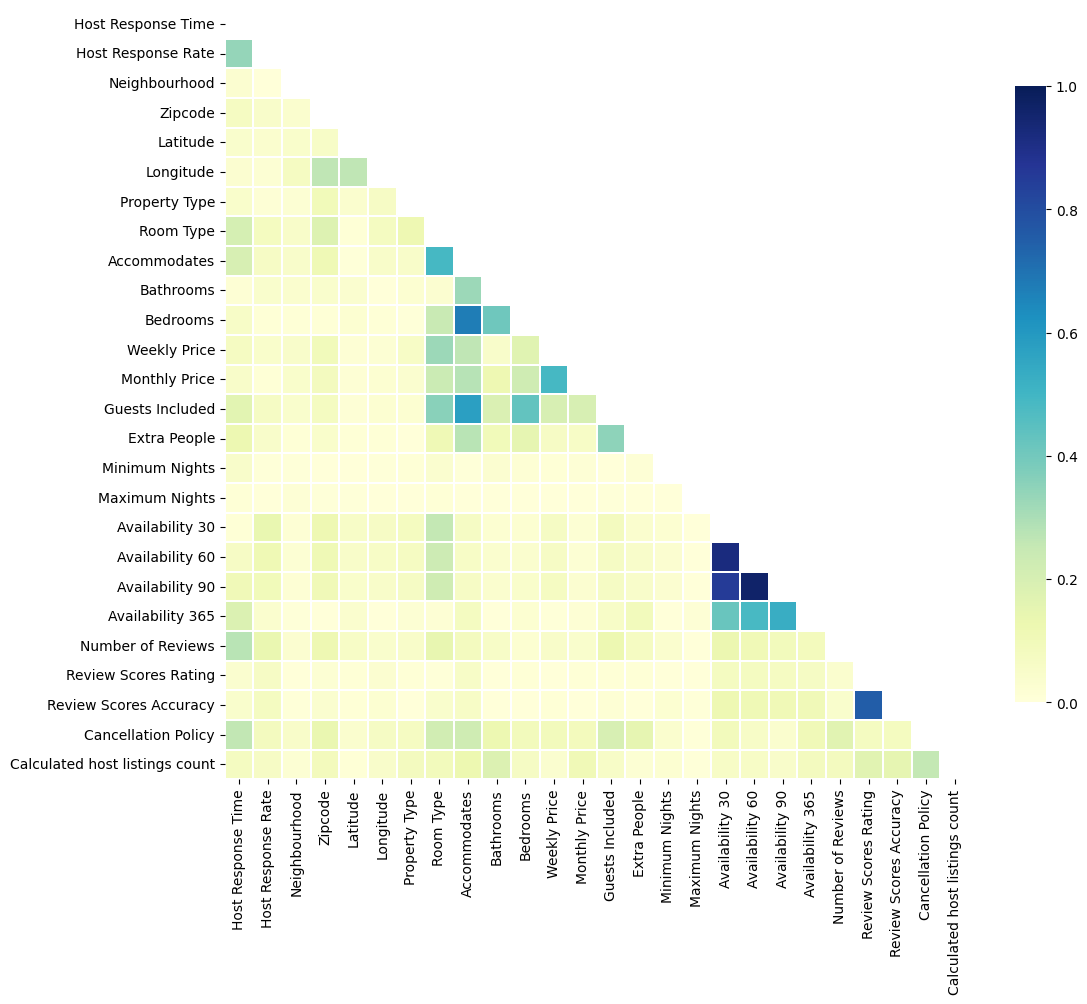

In [33]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool) # dtype=np.bool no me funcina pero si si quito np
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se puede apreciar que Availability entre las diferentes tiempos, tienen mucha correlacion por lo que nos quedamos quedamos  solo con la de 90 dias.

In [34]:
df.drop(['Availability 60', 'Availability 30', 'Availability 365', ], axis=1, inplace=True)

Vemos  tambien que Host Response Time, Zipcode, Neighbourhood Review Scores Rating no tiene ninguna correlacion por la que tambien la eliminamos

In [35]:
df.drop(['Host Response Time','Review Scores Rating','Zipcode', 'Neighbourhood'], axis=1, inplace=True)


Buscamos outliers.

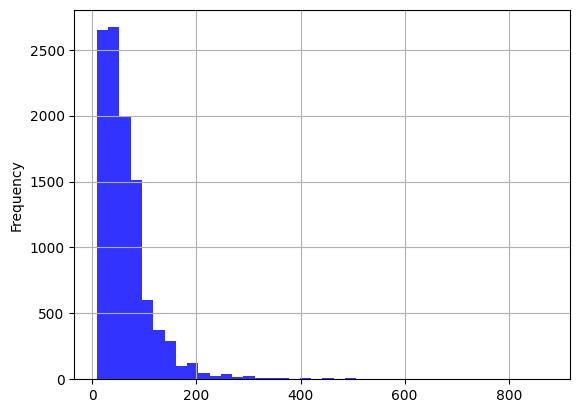

In [36]:
df["Price"].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
plt.show()

In [37]:
len(df[df["Price"] > 300])

78

Hay 44 filas con precios mayores o igual a 300€ que es aproximadamente un 0,4 % del dataset, por tanto vamos a considerarlos outliers y vamos a eliminarlos.

In [38]:
df.drop(df[df['Price']>300].index, inplace = True)
df.shape

(10460, 20)

Histograma de todas las variables para ver su distribución.

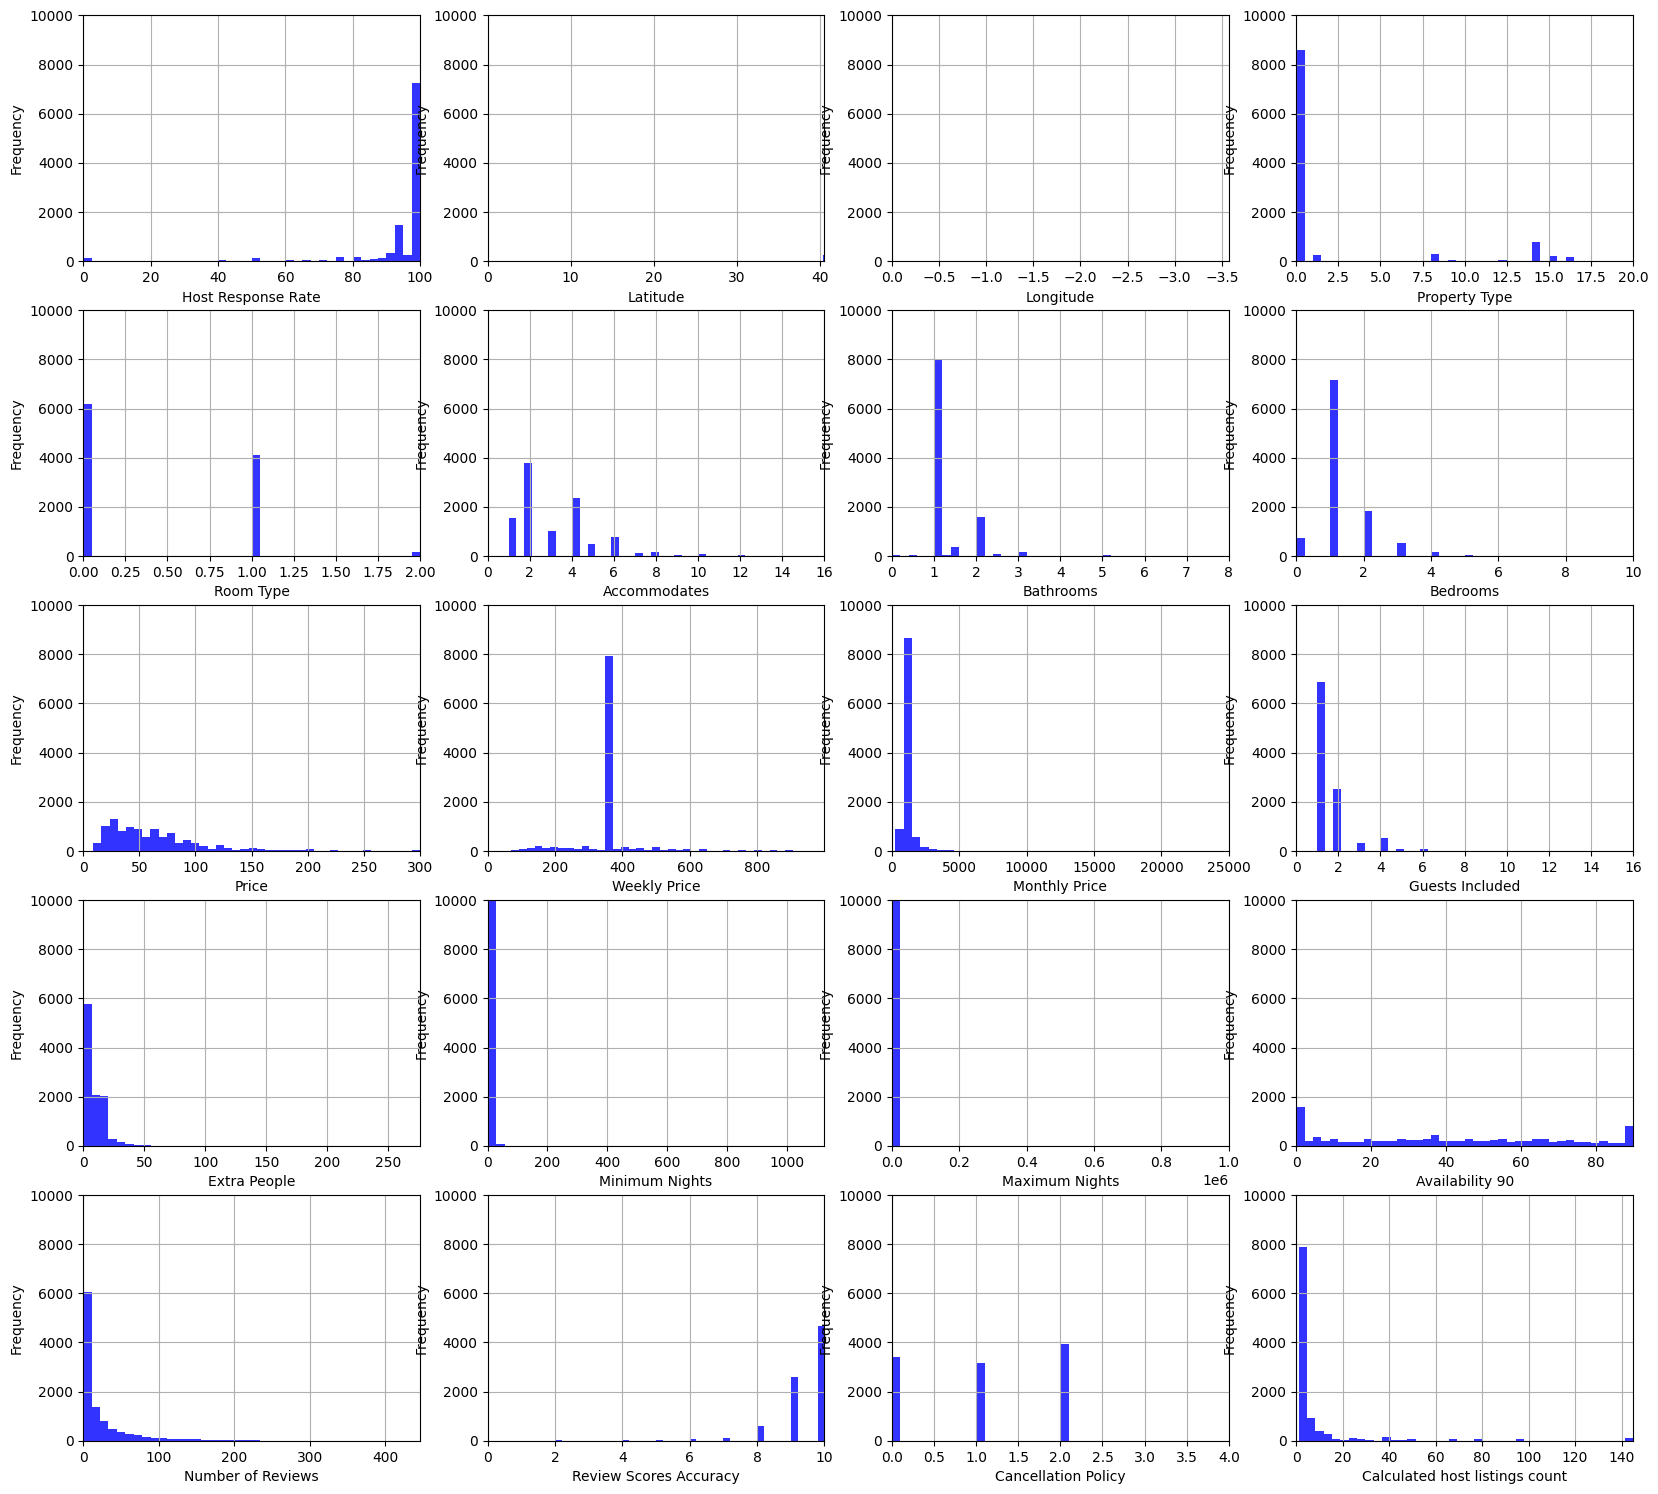

In [39]:
plt.figure(figsize=(20, 30))

for i, c in enumerate(df.columns):
    plt.subplot(8, 4, i + 1)
    df[c].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
    plt.axis([0, np.max(df[c]), 0, 10000])
    plt.xlabel(c)

plt.show()

Podemos ver como las columnas Minimum Nights y Maximum Nights no aportan información al estar todas prácticamente en un mismo valor. Por lo que las eliminaremos.

In [40]:
df.drop(['Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)
len(df.columns)

18

Parece que en Calculated host listings count, Accommodates, Bedrooms y Bathrooms hay outliers

In [41]:
len(df[df["Calculated host listings count"] > 100])


114

In [42]:
df.drop(df[df['Calculated host listings count']>100].index, inplace = True)

In [43]:
len(df[df["Bedrooms"] >= 4])

184

In [44]:
len(df[df["Bedrooms"] <=0])

720

In [45]:
df.drop(df[(df['Bedrooms']<=0) & (df['Bedrooms']>=4)].index, inplace = True)

In [46]:
len(df[df["Bathrooms"] >= 4])

91

In [47]:
len(df[df["Bathrooms"] <=0])

51

In [48]:
df.drop(df[(df['Bathrooms']<=0) & (df['Bathrooms']>=4)].index, inplace = True)


In [49]:
len(df[df["Accommodates"] >=10])


126

In [50]:
df.drop(df[df['Accommodates']>=10].index, inplace = True)
df.shape

(10220, 18)

 
Tenemos 18 columnas.

In [51]:
df.columns

Index(['Host Response Rate', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included', 'Extra People',
       'Availability 90', 'Number of Reviews', 'Review Scores Accuracy',
       'Cancellation Policy', 'Calculated host listings count'],
      dtype='object')

Movemos la columna Price a la primera posición

In [52]:
df = df[['Price', 'Host Response Rate', 
       'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Guests Included','Latitude','Longitude',
       'Extra People','Availability 90', 'Number of Reviews',
       'Cancellation Policy', 'Calculated host listings count','Weekly Price', 'Monthly Price']]
df.head()

,Price,Host Response Rate,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Guests Included,Latitude,Longitude,Extra People,Availability 90,Number of Reviews,Cancellation Policy,Calculated host listings count,Weekly Price,Monthly Price
0,30.0,94.764623,0,1,1,2.0,1.0,1,40.435337,-3.704479,0,67,0,2,38.0,365.601935,1332.075665
1,35.0,100.000000,14,1,2,1.0,1.0,1,40.411727,-3.699766,0,72,0,0,2.0,365.601935,1332.075665
2,150.0,100.000000,0,0,7,2.0,2.0,5,40.416925,-3.701221,25,32,40,0,6.0,365.601935,3000.000000
3,30.0,100.000000,0,1,2,1.0,1.0,1,40.423316,-3.698723,0,48,109,0,3.0,365.601935,1332.075665
4,40.0,94.764623,0,1,1,1.0,1.0,1,40.417376,-3.675383,0,0,0,0,1.0,365.601935,1332.075665


In [53]:
from sklearn import preprocessing

data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)


 # 5- Modelos de Predicción
 Transformaciones para Test de todo lo hecho en Train

In [54]:
df_test= pd.read_csv('./test.csv', sep=';', decimal='.')

df_test.drop([
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Beds', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 'Features' 
    ], 
    axis=1, inplace=True)

df_test = df_test[df_test['City'] == "Madrid"]
df_test.drop(['City'], axis=1, inplace=True)

df_test['Neighbourhood'] = df_test['Neighbourhood'].fillna(df_test['Neighbourhood Cleansed'])
df_test.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

df_test.drop(['Square Feet', 'Security Deposit', 'Cleaning Fee'], axis=1, inplace=True)

df_test['Zipcode'] = df_test['Zipcode'].fillna('NULL')
df_test['Host Response Time'] = df_test['Host Response Time'].fillna('NULL')

df_test['Bathrooms'].fillna(df_test['Bathrooms'].mean(), inplace=True)
df_test['Bedrooms'].fillna(df_test['Bedrooms'].mean(), inplace=True)
df_test['Price'].fillna(df_test['Price'].mean(), inplace=True)
df_test['Host Response Rate'].fillna(df_test['Host Response Rate'].mean(), inplace=True)
df_test['Review Scores Rating'].fillna(df_test['Review Scores Rating'].mean(), inplace=True)
df_test['Weekly Price'].fillna(df_test['Weekly Price'].mean(), inplace=True)
df_test['Monthly Price'].fillna(df_test['Monthly Price'].mean(), inplace=True)


from sklearn.preprocessing import LabelEncoder

le_Neighbourhood = LabelEncoder()
le_P_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_c_Policy = LabelEncoder()
le_Zp = LabelEncoder()
le_H_R_Time = LabelEncoder()


df_test['Neighbourhood'] = le_Neighbourhood.fit_transform(df_test['Neighbourhood'])
df_test['Property Type'] = le_P_Type.fit_transform(df_test['Property Type'])
df_test['Room Type'] = le_Room_Type.fit_transform(df_test['Room Type'])
df_test['Cancellation Policy'] = le_c_Policy.fit_transform(df_test['Cancellation Policy'])
df_test['Zipcode'] = le_Zp.fit_transform(df_test['Zipcode'])
df_test['Host Response Time'] = le_H_R_Time.fit_transform(df_test['Host Response Time'])

df_test.drop(['Availability 60', 'Availability 30', 'Availability 365'], axis=1, inplace=True)

df_test.drop(['Host Response Time','Review Scores Rating','Zipcode', 'Neighbourhood'], axis=1, inplace=True)

df_test.drop(df_test[df_test['Price']>300].index, inplace = True)

df_test.drop(['Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)

df_test.drop(df_test[df_test['Calculated host listings count']>100].index, inplace = True)

df_test.drop(df_test[(df_test['Bedrooms']<=0) & (df_test['Bedrooms']>=4)].index, inplace = True)

df_test.drop(df_test[(df_test['Bathrooms']<=0) & (df_test['Bathrooms']>=4)].index, inplace = True)

df_test.drop(df_test[df_test['Accommodates']>=10].index, inplace = True)


df_test = df_test[['Price', 'Host Response Rate', 
        'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Guests Included','Latitude','Longitude',
       'Extra People','Availability 90', 'Number of Reviews',
       'Cancellation Policy', 'Calculated host listings count','Weekly Price', 'Monthly Price']]


df_test.head().T

,0,1,2,3,4
Price,27.000000,25.000000,150.000000,15.000000,85.000000
Host Response Rate,100.000000,95.058624,95.058624,100.000000,100.000000
Property Type,0.000000,0.000000,0.000000,0.000000,0.000000
Room Type,1.000000,1.000000,0.000000,1.000000,0.000000
Accommodates,2.000000,2.000000,4.000000,1.000000,3.000000
Bathrooms,1.000000,2.000000,3.000000,2.000000,1.500000
Bedrooms,1.000000,1.000000,2.000000,1.000000,1.000000
Guests Included,1.000000,1.000000,4.000000,1.000000,3.000000
Latitude,40.442108,40.421378,40.409602,40.412154,40.429136
Longitude,-3.680454,-3.697266,-3.693580,-3.708006,-3.692421


In [55]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# este escalado se realiza con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

# 6 Regresion lineal

In [76]:
lr = LinearRegression().fit(XtrainScaled, y_train)
print("Accuracy en train:", lr.score(XtrainScaled, y_train))
print("Accuracy en test:", lr.score(XtestScaled, y_test))

Accuracy en train: 0.533600362346888
Accuracy en test: 0.5359840471641746


best mean cross-validation score: -814.109
best parameters: {'alpha': 0.16237767391887217}


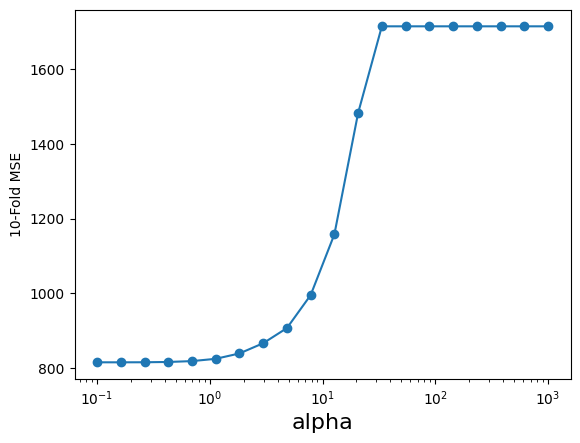

In [77]:

# utilizamos  Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,3,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel(f'{10}-Fold MSE')
plt.show()



In [78]:
from sklearn.metrics import mean_squared_error, r2_score

alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('R^2 (train): %0.3g' % r2_score(y_train,ytrainLasso))
print('R^2 (test) : %0.3g' % r2_score(y_test,ytestLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)



MSE Modelo Lasso (train): 823
MSE Modelo Lasso (test) : 840
RMSE Modelo Lasso (train): 28.7
RMSE Modelo Lasso (test) : 29
R^2 (train): 0.52
R^2 (test) : 0.527
Host Response Rate -0.0
Property Type 0.0
Room Type -13.137887271794133
Accommodates 10.596233877352871
Bathrooms 3.8317403667446115
Bedrooms 5.9141135954223385
Guests Included 0.0
Latitude 0.5274994555208676
Longitude -0.0
Extra People -0.0
Availability 90 1.1742662531392272
Number of Reviews -1.7641666478671079
Cancellation Policy 0.0
Calculated host listings count 0.9326475604593724
Weekly Price 1.4151981459086882
Monthly Price 4.590629364191109


best mean cross-validation score: -814.426
best parameters: {'alpha': 0.1}


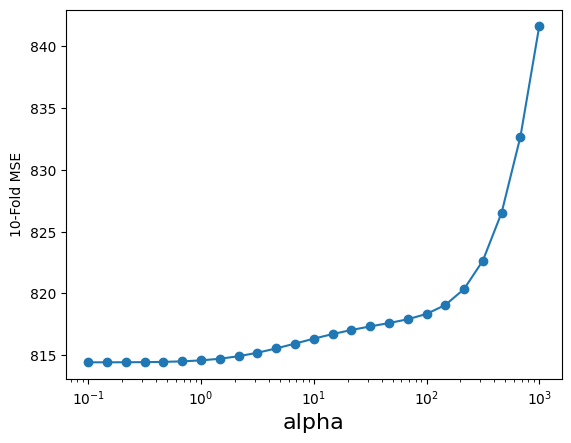

In [79]:
# Utilizamos  Ridge 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha_vector = np.logspace(-1,3,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
#grid.fit(XtrainScaled, y_train)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel(f'{10}-Fold MSE')
#plt.ylim((0, 1))
plt.show()

In [80]:

from sklearn.metrics import mean_squared_error, r2_score

alpha_optimo = grid.best_params_['alpha']*10
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)
#ridge = Ridge(alpha = alpha_optimo).fit(X_train,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge  = ridge.predict(XtestScaled)
#ytrainRidge = ridge.predict(X_train)
#ytestRidge  = ridge.predict(X_test)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)

print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

print('R^2 (train): %0.3g' % r2_score(y_train,ytrainRidge))
print('R^2 (test) : %0.3g' % r2_score(y_test,ytestRidge))

MSE Modelo Ridge (train): 800
MSE Modelo Ridge (test) : 825
RMSE Modelo Ridge (train): 28.3
RMSE Modelo Ridge (test) : 28.7
R^2 (train): 0.534
R^2 (test) : 0.536


# 7 Arbol de decision

best parameters: {'max_depth': 8}


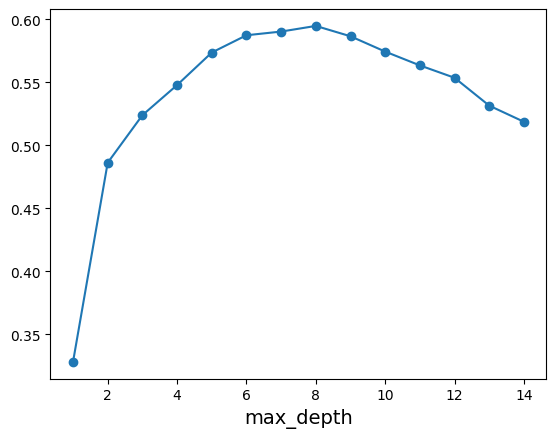

In [61]:
max_depth = range(1,15)
parameters = {'max_depth': max_depth}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=10)
grid.fit(XtrainScaled, y_train)

print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth, scores, '-o')
plt.xlabel('max_depth', fontsize=14)
plt.show()

In [62]:
max_depth_opt = grid.best_params_['max_depth']
reg_tree = DecisionTreeRegressor(max_depth=max_depth_opt).fit(XtrainScaled, y_train)

In [63]:
print("Accuracy en train:", reg_tree.score(XtrainScaled, y_train))
print("Accuracy en test:", reg_tree.score(XtestScaled, y_test))

Accuracy en train: 0.7167264247477533
Accuracy en test: 0.6182545787036935


# 8 Random forest

best mean cross-validation score: 0.722
best parameters: {'max_depth': 14}


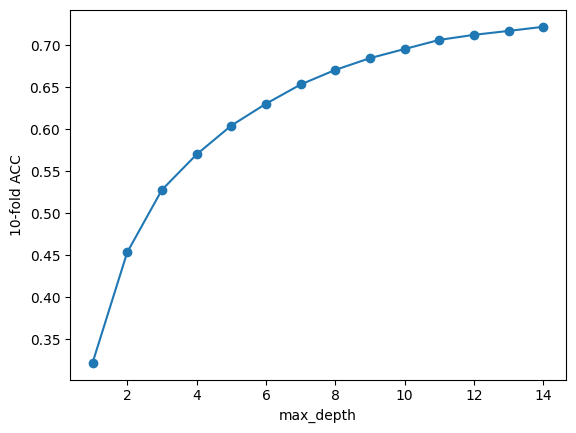

In [64]:
maxDepth = range(1,15)
parameters = {'max_depth': maxDepth}
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='log2'), param_grid=parameters, cv=10) 
grid.fit(XtrainScaled, y_train.ravel())


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

La mejor profundidad que nos da es 14

In [65]:
model = RandomForestRegressor(max_depth=14,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train) 

In [66]:
print("Accuracy en train:", model.score(XtrainScaled, y_train))
print("Accuracy en test:", model.score(XtestScaled, y_test))

Accuracy en train: 0.880291951367976
Accuracy en test: 0.7098769313826205


# 9 Boosted Trees

In [67]:


from sklearn.ensemble import GradientBoostingRegressor
Niterations = [200, 250, 1000] 
learningRate = [0.1,0.05, 0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5), param_grid=param_grid, cv = 10, n_jobs=4)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))



best mean cross-validation score: 0.733
best parameters: {'learning_rate': 0.1, 'n_estimators': 250}


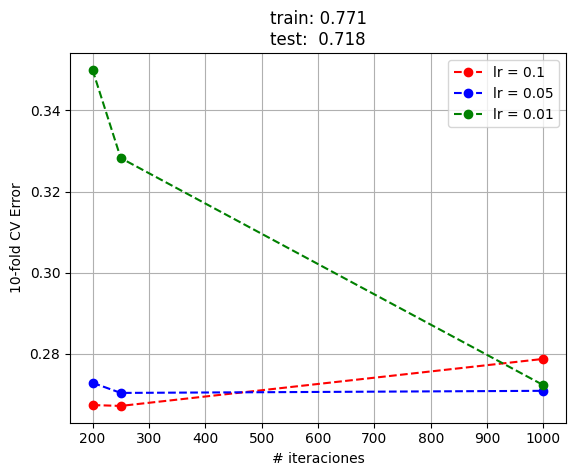

In [68]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel(f'{10}-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()



Importancia y dependencias de las varibles predictoras


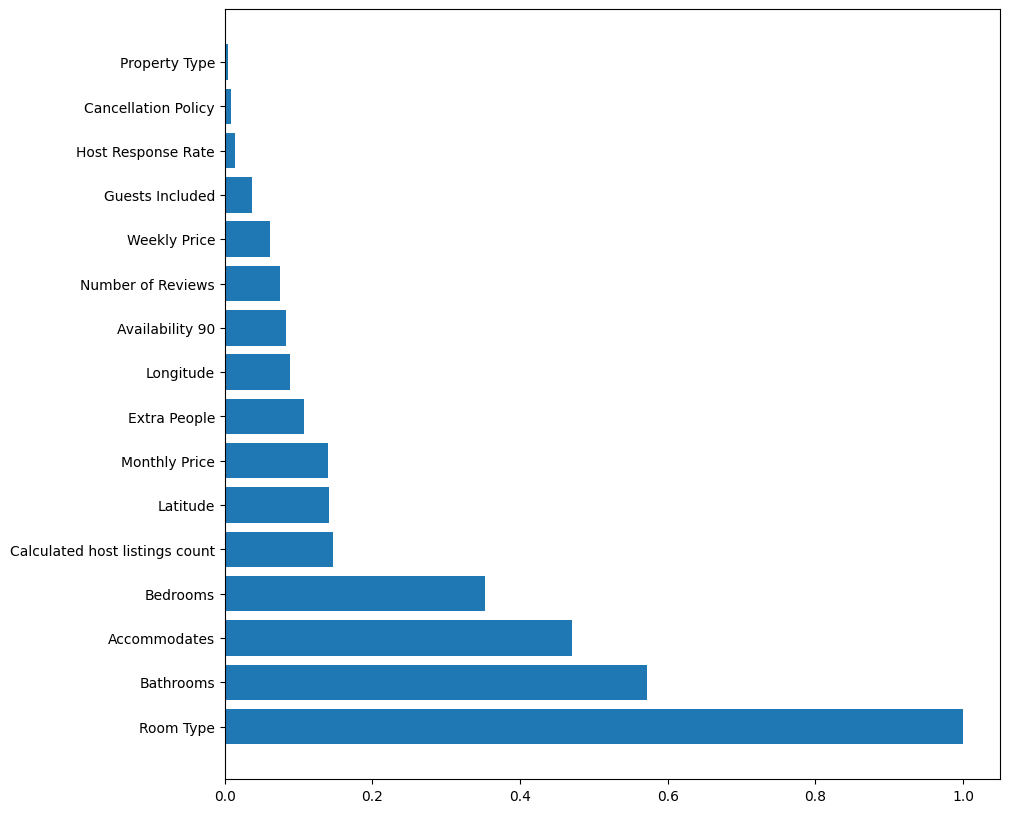

In [69]:


importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()




# 10 SVM (Support Vector Machine)

In [70]:


from sklearn.svm import SVR

cv = 10

array_C = np.logspace(-2, 2, 10)
array_gamma = np.logspace(-5, 1, 8)

param_grid = {'C': array_C, 'gamma':array_gamma}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = cv, verbose=1, n_jobs=4)
grid.fit(XtrainScaled, y_train)



Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=4,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=1)

In [71]:


Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Train: %0.2f'%svmModel.score(XtrainScaled,y_train))
print('Test: %0.2f'%svmModel.score(XtestScaled,y_test))



Train: 0.72
Test: 0.69


# 11 Conclusiones:


Con el objetivo de intentar predecir los precios de alquiler de Airbnb, hemos ejecutado varios modelos de regresión de ML.

| Modelo | Train  | Test |
|:------------- |:---------------:| -------------:|
| Regresion lineal      | Accuracy en train: 0.533|Accuracy en test: 0.535    |
| Regresion lineal  Lasso      |  R^2 (train): 0.52 |R^2 (test) : 0.527      |
| Regresion lineal  Ridge        | R^2 (train): 0.534       | R^2 (test) : 0.536      |
| Arbol de decision         | 0.716         | 0.618       |
| Random Forest        | 0.88          | 0.709       |
| Boosted Trees        | 0.771          | 0.718        |
| SVG        | 0.72         | 0.69        |


Vemos que el modelo Random Forest tiene una prediccion que comienza a ser aceptable. Boosted Trees ademas, es mejor  y su precision entre el conjunto de entrenamiento y el de test es mas ajustado por lo que podemos decir que tiene una mejor capacidad para generalizar nuevos datos.

Para intentar mejorar los resultados tendiramos que cambiar la cantidad de variables del modelo incluso crear otras a partir de las existentes. Tambien seria interesante hacer una transformacion de alguna columna.